## Chapter 1: Minimum elements to consider for inclusion in a plot.

We will work out the examples using data from an absorption spectrum measurement. 
1.	What are the AXES? 

The horizontal axis represents the INDEPENDENT VARIABLE.   The vertical axis represents the VALUE of the data (DEPENDENT VARIABLE) for a specific value of the INDEPENDENT VARIABLE.


(Note: since we don’t know the values of the dataset, we cannot define the limits of the axes yet, nor should we see any ticks)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

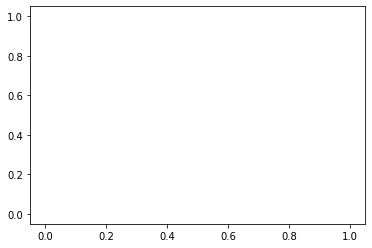

In [4]:
plt.plot()
plt.show()

2. Axes LABELS

Axes need to be labeled by the NAME of the quantity being measured and variable being changed. 

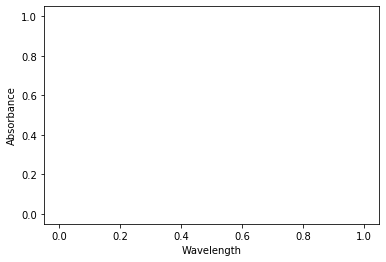

In [5]:
plt.plot()
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.show()

3.	UNITS

Each label has the units in parenthesis. These are the UNITS used in the measurement.  If numbers are written with scientific notation, the 10xxx could be written before the units


Example1: variable is wavelength, which can be written in nm, so draw the axis with label “Wavelength (nm)”

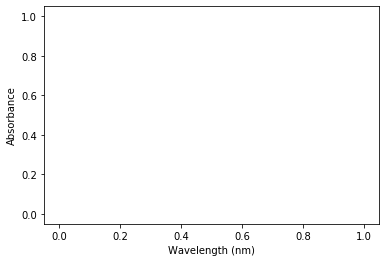

In [6]:
plt.plot()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.show()

Example 2: variable is wavelength and we want to report it in m, so draw the axis with label “Wavelength (10-9 m)”

4.	Axes LIMITS

To properly decide how to represent the data points, we need to be sure we are maximizing the use of the available space.   Ideal graphs have the data plotted in a range such that the results occupy ~ 80 % of the graphing area.

4.1.	In the dataset look for the minimum value of the Independent Variable.  
If your data has all positive values of the Independent Variable but requires that you show the value for Independent Variable =0, then start your horizontal axis at 0. Otherwise, 
Set the minimum value plotted for the x-axis to a value = xmin -10%
Set the maximum value plotted for the x-axis to a value = xmax +10% 

4.2.	In the dataset look for the maximum value of the Independent Variable.  
If your data has all positive values of the Dependent Variable but requires that you show the value for Dependent Variable =0, then start your horizontal axis at 0. Otherwise, 
Set the minimum value plotted for the y-axis to a value = ymin -10%
Set the maximum value plotted for the y-axis to a value = xmax +10% 
May be we can show a small table that has 

Wavelength (nm)	Absoprtion (O.D.)  
235	0.32  
240	0.36  
	:  
360	0.89  
365	0.60  
X min-10% = 212. 	Xmax +10% =401 
Ymin-10% = 0.29.  	Ymax+10% = 0.98.  
Add values of Xmin-10%,  xmax +10% ,  ymin -10%, xmax +10%  to the previous plot. 
For absorption data, we want to plot the Absorption starting at 0
Repeat the plot with the vertical axis starting at 0. 


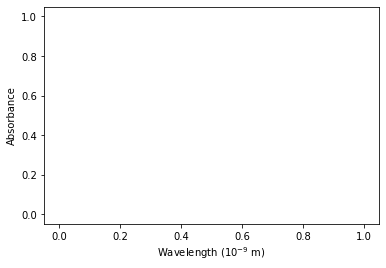

In [12]:
plt.plot()
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

5.	Plotting the DATAPOINTS
Now we are ready to add the datapoints.   Data comes in many flavors; each one requires a different type of representation. 

5.1.	Scattered data points. These are discreet data points from which we don’t know (yet) the functional shape.
For a plot with discrete points, DO NOT connect the points with lines, since those lines bear no meaning.  If all data points correspond to a measurement, then all of them should be represented by a symbol with the same color and shape. 
The symbol used for the data points need to be large enough to see them, but not too large that the actual value of the Dependent Variable might become less precise.

Show a plot of 5 data points, using a circle as a symbol. 
Next to each other draw two plots 
Left:  too small (use very small symbol size so it’s hard to read)
Right: too large (use very large symbol size so the value of y-value looks like has a large error bar not sure how else to describe it) 
Example: Add the 5 data points to the plot with a reasonable size symbol

5.2.	Continuous datapoints
A plot with continuous data points is obtained when the separation between individual datapoints is smaller than the resolution between two measurements. 
When that is the case, we can have the datapoints connected by a line (which could be spline), not because we know the functional shape of the data, but because the individual datapoints are not differentiable.  We should not use a straight line through the whole data, we can only use lines between two consecutive points, or just plot the datapoint with symbols, which, if they are of reasonable size, will overlap. 
Show a plot with a dataset containing 100 points, so it will look as a continuum.  
Did we choose the right axes limits?  We can check this by changing the limits in the horizontal and vertical axes and seeing what happens to the data plotted. 
Repeat the same plot. For each axis, create two sliding bars, one of them can change the axis spanning-range and the other can change the initial value of the axis.
The idea is for the user to increase and decrease the x or y range or shift it to see how the data (already plotted) gets compressed to a corner or outside the range plotted. 


In [9]:
data = pd.read_csv('https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-09-25-wave_abs.csv')

In [12]:
wavenumber = data['wavenumber'].values
absorbance = data['absorbance'].values

In [1]:
wavenumber = [1.6 , 1.6055, 1.6111, 1.6166, 1.6222, 1.6277, 1.6333, 1.6388, 1.6444, 1.6499]
absorbance = [4.15029336e-23, 1.84158518e-22, 1.58350762e-22, 1.15138014e-22, 2.90880985e-22, 6.31324110e-22, 1.34283525e-20, 1.17794883e-21, 2.54055012e-22, 1.08915067e-22]

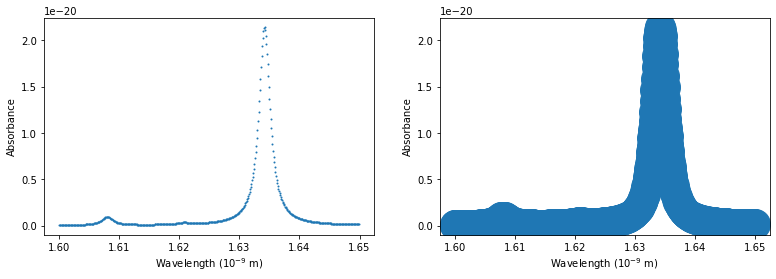

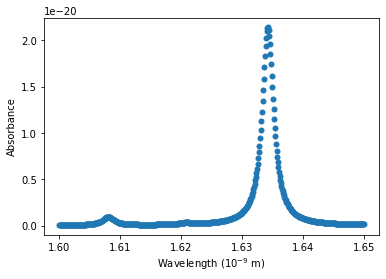

In [3]:
plt.figure(figsize=(13, 4))
# plt.subplot(total_rows, total_column, order)
# left
plt.subplot(1, 2, 1)
plt.plot(wavenumber, absorbance, 'o', markersize=1)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')

# right
plt.subplot(1, 2, 2)
plt.plot(wavenumber, absorbance, 'o', markersize=30)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

# good one example
plt.plot(wavenumber, absorbance, 'o', markersize=5)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

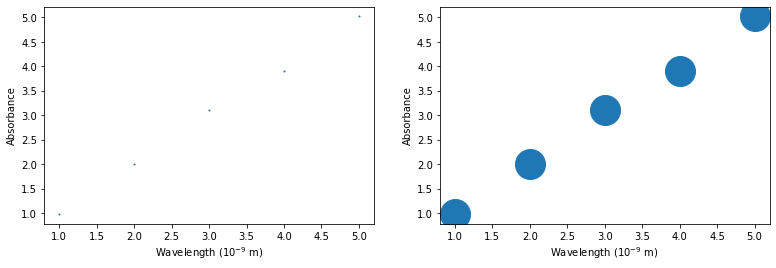

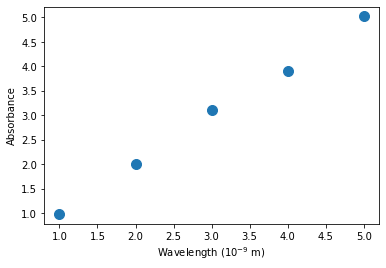

In [35]:
# prepare data
x = [1, 2, 3, 4, 5]
y = [0.98, 2.01, 3.10, 3.90, 5.02]

plt.figure(figsize=(13, 4))
# plt.subplot(total_rows, total_column, order)
# left
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o', markersize=1)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')

# right
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', markersize=30)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

# good one example
plt.plot(x, y, 'o', markersize=10)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

In [71]:
x = np.arange(start=1, stop=101, step=1)
y = np.linspace(start=1, stop=100, num=100)
print('x is ', x)
print('y is ',y)

x is  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
y is  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


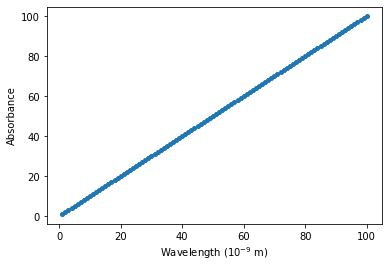

In [72]:
plt.plot(x, y, 'o-', markersize=4)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

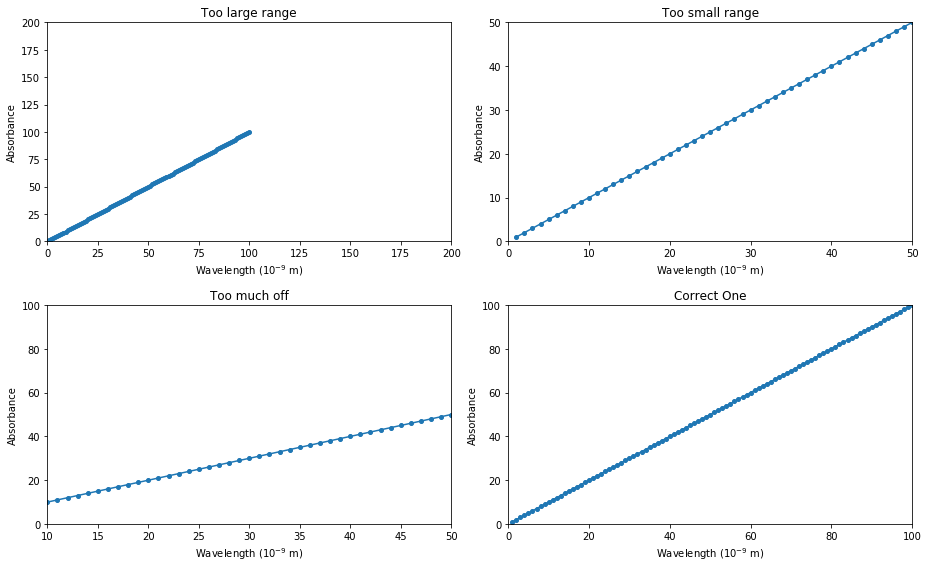

In [87]:
plt.figure(figsize=(13, 8))

# plt.subplot(total_rows, total_column, order)
# left
plt.subplot(2, 2, 1)
plt.plot(x, y, 'o-', markersize=4)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.title('Too large range')

# right
plt.subplot(2, 2, 2)
plt.plot(x, y, 'o-', markersize=4)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.title('Too small range')

# left
plt.subplot(2, 2, 3)
plt.plot(x, y, 'o-', markersize=4)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.xlim(10, 50)
plt.ylim(0, 100)
plt.title('Too much off')

# right
plt.subplot(2, 2, 4)
plt.plot(x, y, 'o-', markersize=4)
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Correct One')

plt.tight_layout()
plt.show()

6.	 REVISED Axes Limits  
Once the full range of the graph is well defined and chosen, go back to #4 (Axes limits) and look for integer values near the ideal limits of your plots.  Change the limits to these values, just to make it easier on the eye of the reader. 

Repeat the plot using x= 200 to 400    y = 0 to 1


7.	Axes TICK MARKS
Add ticks to each axis, such that you divide the full range in about 5 or 6 equally spaced regions.  If you want to show a grid, these ticks will define the positions of the grid lines.  If you add too many tick marks, the labels of the tick mark will overlap, making it hard to read, if you add too few, it makes it hard to gauge the position of datapoints in between tick marks.   Add the labels of those tick marks. Use a font size smaller than the Axes label, but large enough that it can be easily (usually the same font size as the rest of document you are preparing, 10- 12 pt).

Draw the plot including tick marks and their labels


8.	At the end, we must include a Title for the plot 
Draw the final complete graph with all required information 


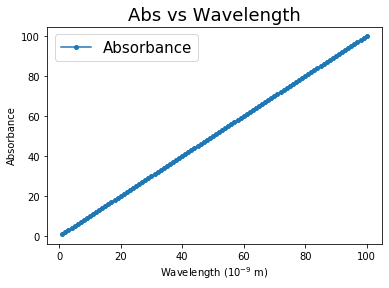

In [65]:
plt.plot(x, y, 'o-', markersize=4, label='Absorbance')
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.title('Abs vs Wavelength',  fontsize=18)
plt.legend(fontsize=15)
plt.show()